In [8]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [9]:
sampling_methods = ['random', 'uncertainty', "BGADL", "OpenMax", "Core_set", 'certainty', 'active_query', 'AV_temperature', 'test_query']
datasets = {'Tiny-Imagenet': {'init_percent': 8, 'known_class': [40], 'batch': [200, 400, 600]},
            'cifar100': {'init_percent': 8, 'known_class': [20], 'batch': [200, 400, 600]},
            'cifar10': {'init_percent': 1, 'known_class': [2], 'batch': [200, 400, 600]}}

In [42]:
def load_pkl_files(dataset_name, known_class, batch_size=None):
    pkl_files = {method: [] for method in sampling_methods}
    log_al_folder = 'log_AL/'
    for file in os.listdir(log_al_folder):
        if file.endswith('.pkl') and f"{dataset_name}_" in file and f"known{known_class}" in file:
            if batch_size is not None and f"batch{batch_size}_" not in file:
                continue
            for method in sampling_methods:
                if method in file:
                    if "_per_round_query_index" in file:
                        continue
                    pkl_files[method].append(os.path.join(log_al_folder, file))
                    break
    return pkl_files

In [79]:
def plot_graphs(group_name, acc_list, precision_list, recall_list, acc_std_list, precision_std_list, recall_std_list, batch_size):
    method_colors = {sampling_methods[i]: plt.cm.tab10(i) for i in range(len(sampling_methods))}
    method_colors['Proposed'] = method_colors['active_query']

    # Accuracy plot
    query_numbers = list(range(len(acc_list[0])))

    fig, ax = plt.subplots()
    for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
        label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
        ax.plot(query_numbers, acc, label=label, color=method_colors[label])
        ax.fill_between(query_numbers, np.array(acc) - 0.8 * np.array(acc_std), np.array(acc) + 0.8 * np.array(acc_std), alpha=0.2, color=method_colors[label])

    ax.set_xlabel('Query Numbers')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{group_name.split()[0]} Batch {batch_size}')

    if group_name == "Tiny-Imagenet Known 40 Batch 200":
        # Create an inset axis
        ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper left', borderpad=1)
        half_length = len(query_numbers) // 2
        for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
            label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
            if label == 'test_query' or label == 'Proposed':
                if label == 'Proposed':
                    label = "active_query"
                ax_inset.plot(query_numbers[half_length:], acc[half_length:], label=label, color=method_colors[label])
                ax_inset.fill_between(query_numbers[half_length:], np.array(acc[half_length:]) - 0.8 * np.array(acc_std[half_length:]), np.array(acc[half_length:]) + 0.8 * np.array(acc_std[half_length:]), alpha=0.2, color=method_colors[label])

        ax_inset.set_xlim(6.0, query_numbers[-1])  # Set x-axis from 6.0 to the end
        ax_inset.set_ylim(36, 42)  # Set y-axis range from 36 to 42
        ax_inset.xaxis.set_ticklabels([])  # Remove x-axis numbers
        ax_inset.yaxis.set_ticklabels([])  # Remove x-axis numbers
        for tic in ax_inset.xaxis.get_major_ticks() + ax_inset.yaxis.get_major_ticks():
            tic.tick1line.set_visible(False)
            tic.tick2line.set_visible(False)

    plt.show()

    fig, ax = plt.subplots()
    for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
        label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
        ax.plot(query_numbers, np.array(precision) * 100, label=label, color=method_colors[label])
        ax.fill_between(query_numbers, (np.array(precision) - 0.8 * np.array(precision_std)) * 100, (np.array(precision) + 0.8 * np.array(precision_std)) * 100, alpha=0.2, color=method_colors[label])

    ax.set_xlabel('Query Numbers')
    ax.set_ylabel('Precision (%)')
    ax.set_title(f'{group_name.split()[0]} Batch {batch_size}')

    if group_name == "Tiny-Imagenet Known 40 Batch 200":
        # Create an inset axis
        ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper left', borderpad=1)
        half_length = len(query_numbers) // 2
        for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
            label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
            if label == 'test_query' or label == 'Proposed':
                if label == 'Proposed':
                    label = "active_query"
                ax_inset.plot(query_numbers[half_length:], np.array(precision[half_length:]) * 100, label=label, color=method_colors[label])
                ax_inset.fill_between(query_numbers[half_length:], (np.array(precision[half_length:]) - 0.8 * np.array(precision_std[half_length:])) * 100, (np.array(precision[half_length:]) + 0.8 * np.array(precision_std[half_length:])) * 100, alpha=0.2, color=method_colors[label])

        ax_inset.set_xlim(6.0, query_numbers[-1])  # Set x-axis from 6.0 to the end
        ax_inset.set_ylim(70, 90)  # Set y-axis range from 70 to 90
        ax_inset.xaxis.set_ticklabels([])  # Remove x-axis numbers
        ax_inset.yaxis.set_ticklabels([])  # Remove x-axis numbers
        # ax_inset.set_xlabel('Query Numbers')
        # ax_inset.set_ylabel('Precision (%)')
                # Make tick marks invisible
        for tic in ax_inset.xaxis.get_major_ticks() + ax_inset.yaxis.get_major_ticks():
            tic.tick1line.set_visible(False)
            tic.tick2line.set_visible(False)
    plt.show()

    plt.figure()
    for i, (recall, recall_std) in enumerate(zip(recall_list, recall_std_list)):
        label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
        plt.plot(query_numbers, np.array(recall) * 100, label=label)  # Multiply by 100
        plt.fill_between(query_numbers, (np.array(recall) - 0.8 * np.array(recall_std)) * 100, (np.array(recall) + 0.8 * np.array(recall_std)) * 100, alpha=0.3)
    plt.xlabel('Query Numbers')
    plt.ylabel('Recall (%)')  # Update ylabel
    plt.title(f'{group_name.split()[0]} Batch {batch_size}')
    # plt.legend()
    plt.show()

    if group_name == "Tiny-Imagenet Known 40 Batch 200":
        plt.figure()
        half_length = len(query_numbers) // 2
        for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
            label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
            if label == 'test_query' or label == 'Proposed':
                if label == 'Proposed':
                    label = "active_query"
                plt.plot(query_numbers[half_length:], acc[half_length:], label=label, color=method_colors[label])
                plt.fill_between(query_numbers[half_length:], np.array(acc[half_length:]) - 0.8 * np.array(acc_std[half_length:]), np.array(acc[half_length:]) + 0.8 * np.array(acc_std[half_length:]), alpha=0.2, color=method_colors[label])

        plt.xlim(6.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
        plt.ylim(36, 42)  # Set y-axis range from 36 to 42
        plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
        plt.xlabel('Query Numbers')
        plt.ylabel('Accuracy')
        plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
        plt.show()

        plt.figure()
        half_length = len(query_numbers) // 2
        for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
            label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
            if label == 'test_query' or label == 'Proposed':
                if label == 'Proposed':
                    label = "active_query"
                plt.plot(query_numbers[half_length:], np.array(precision[half_length:]) * 100, label=label, color=method_colors[label])
                plt.fill_between(query_numbers[half_length:], (np.array(precision[half_length:]) - 0.8 * np.array(precision_std[half_length:])) * 100, (np.array(precision[half_length:]) + 0.8 * np.array(precision_std[half_length:])) * 100, alpha=0.2, color=method_colors[label])

        plt.xlim(6.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
        plt.ylim(70, 90)  # Set y-axis range from 70 to 90
        plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
        plt.xlabel('Query Numbers')
        plt.ylabel('Precision (%)')
        plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
        plt.show()
    # if group_name == "Tiny-Imagenet Known 40 Batch 400":
    #     plt.figure()
    #     half_length = len(query_numbers) // 2
    #     for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
    #         label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
    #         if label == 'test_query' or label == 'Proposed':
    #             plt.plot(query_numbers[half_length:], acc[half_length:], label=label)
    #             plt.fill_between(query_numbers[half_length:], np.array(acc[half_length:]) - 0.8 * np.array(acc_std[half_length:]), np.array(acc[half_length:]) + 0.8 * np.array(acc_std[half_length:]), alpha=0.2)
    #
    #     plt.xlim(5.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
    #     plt.ylim(40.5, 52.0)  # Set y-axis range from 36 to 42
    #     plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
    #     plt.xlabel('Query Numbers')
    #     plt.ylabel('Accuracy')
    #     plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
    #     plt.show()
    #
    #     plt.figure()
    #     half_length = len(query_numbers) // 2
    #     for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
    #         label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
    #         if label == 'test_query' or label == 'Proposed':
    #             plt.plot(query_numbers[half_length:], np.array(precision[half_length:]) * 100, label=label)
    #             plt.fill_between(query_numbers[half_length:], (np.array(precision[half_length:]) - 0.8 * np.array(precision_std[half_length:])) * 100, (np.array(precision[half_length:]) + 0.8 * np.array(precision_std[half_length:])) * 100, alpha=0.2)
    #
    #     plt.xlim(6.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
    #     plt.ylim(77.5, 92.5)  # Set y-axis range from 70 to 90
    #     plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
    #     plt.xlabel('Query Numbers')
    #     plt.ylabel('Precision (%)')
    #     plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
    #     plt.show()
    #
    # if group_name == "Tiny-Imagenet Known 40 Batch 600":
    #     plt.figure()
    #     half_length = len(query_numbers) // 2
    #     for i, (acc, acc_std) in enumerate(zip(acc_list, acc_std_list)):
    #         label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
    #         if label == 'test_query' or label == 'Proposed':
    #             plt.plot(query_numbers[half_length:], acc[half_length:], label=label)
    #             plt.fill_between(query_numbers[half_length:], np.array(acc[half_length:]) - 0.8 * np.array(acc_std[half_length:]), np.array(acc[half_length:]) + 0.8 * np.array(acc_std[half_length:]), alpha=0.2)
    #
    #     plt.xlim(5.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
    #     plt.ylim(47.5, 55.0)  # Set y-axis range from 36 to 42
    #     plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
    #     plt.xlabel('Query Numbers')
    #     plt.ylabel('Accuracy')
    #     plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
    #     plt.show()
    #
    #     plt.figure()
    #     half_length = len(query_numbers) // 2
    #     for i, (precision, precision_std) in enumerate(zip(precision_list, precision_std_list)):
    #         label = sampling_methods[i] if sampling_methods[i] != 'active_query' else 'Proposed'
    #         if label == 'test_query' or label == 'Proposed':
    #             plt.plot(query_numbers[half_length:], np.array(precision[half_length:]) * 100, label=label)
    #             plt.fill_between(query_numbers[half_length:], (np.array(precision[half_length:]) - 0.8 * np.array(precision_std[half_length:])) * 100, (np.array(precision[half_length:]) + 0.8 * np.array(precision_std[half_length:])) * 100, alpha=0.2)
    #
    #     plt.xlim(6.0, query_numbers[-1])  # Set x-axis from 7.0 to the end
    #     plt.ylim(80.5, 90.5)  # Set y-axis range from 70 to 90
    #     plt.gca().xaxis.set_ticklabels([])  # Remove x-axis numbers
    #     plt.xlabel('Query Numbers')
    #     plt.ylabel('Precision (%)')
    #     plt.title(f'{group_name.split()[0]} Batch {batch_size} enlarge')
    #     plt.show()

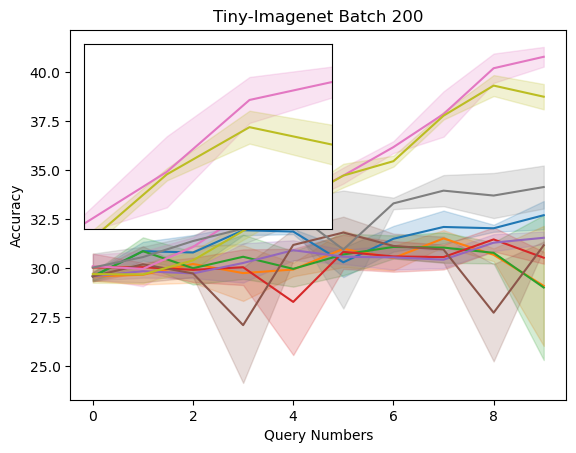

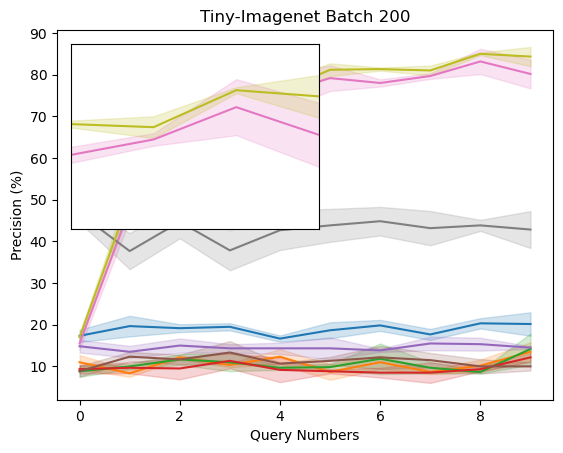

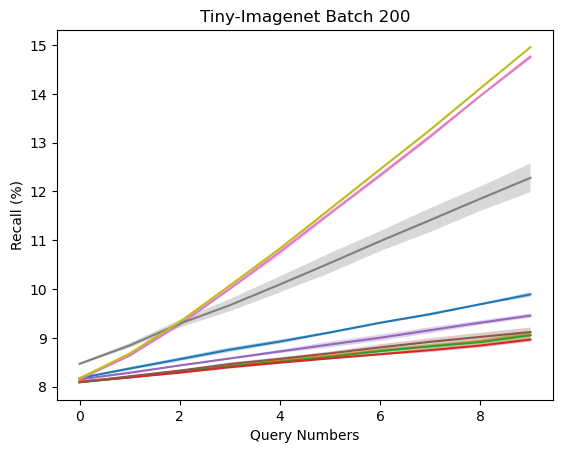

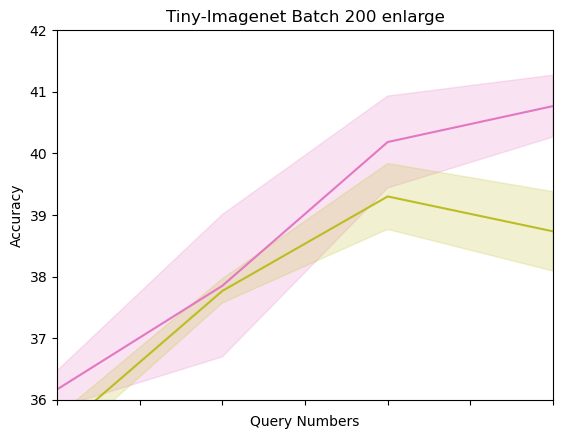

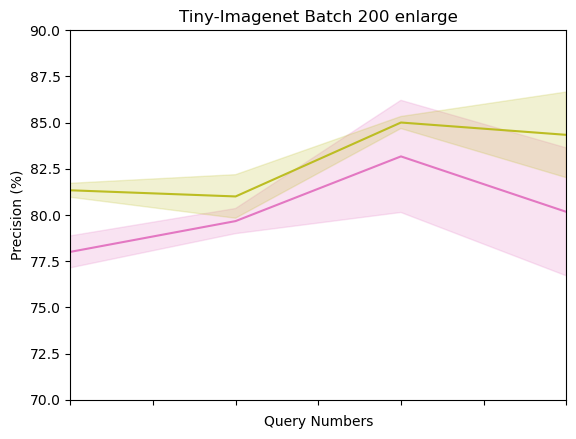

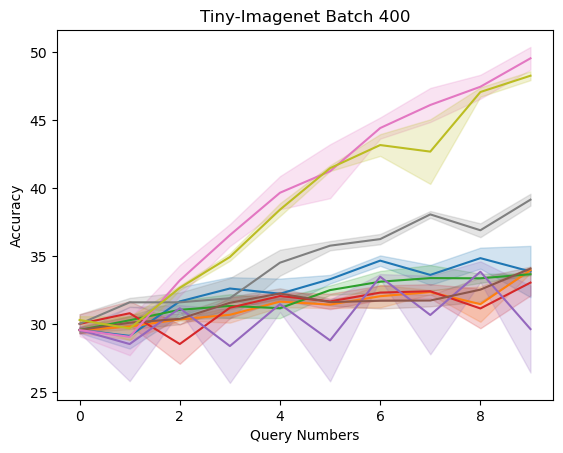

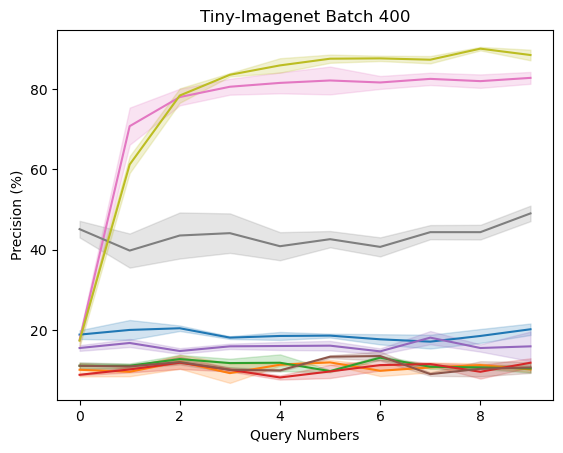

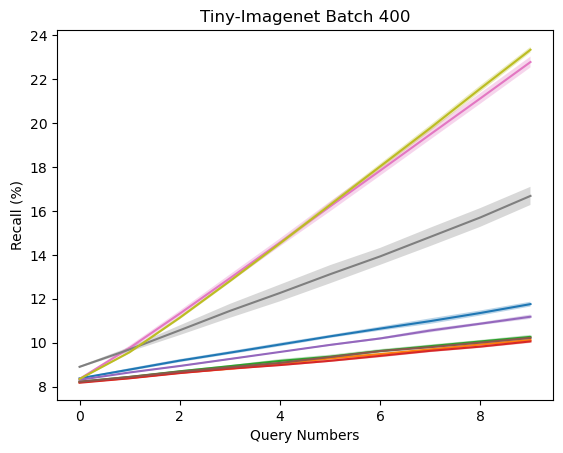

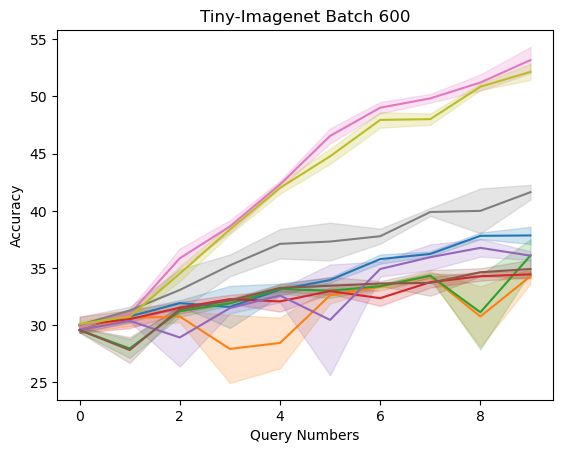

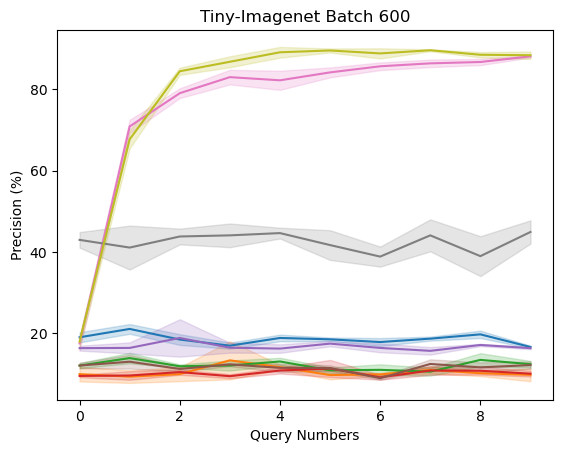

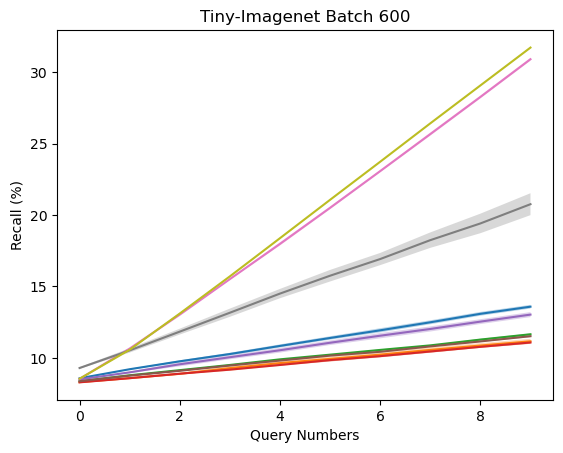

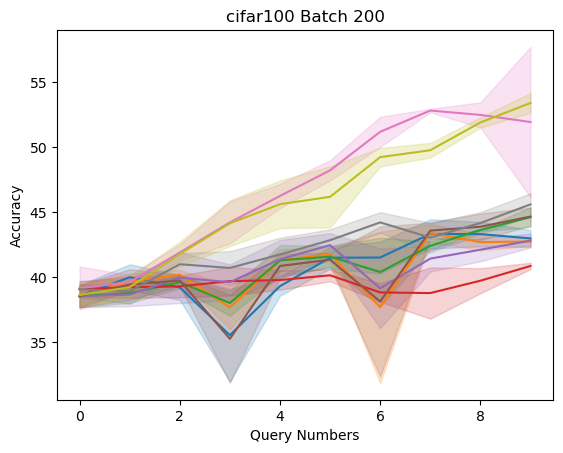

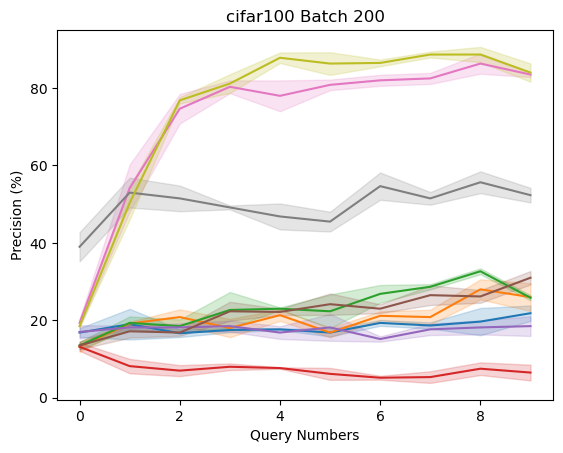

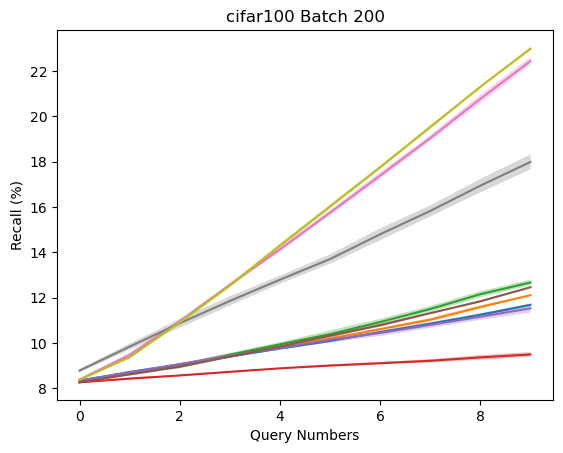

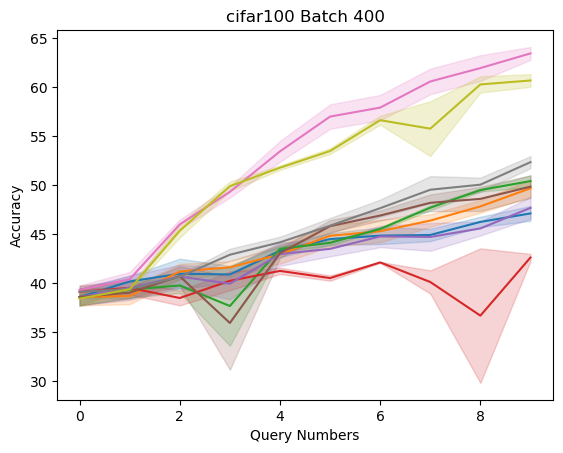

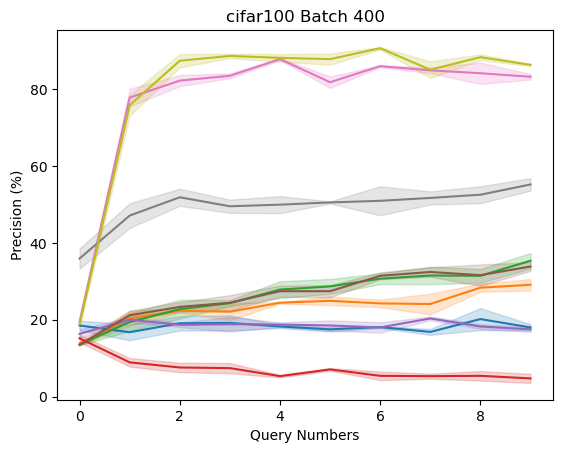

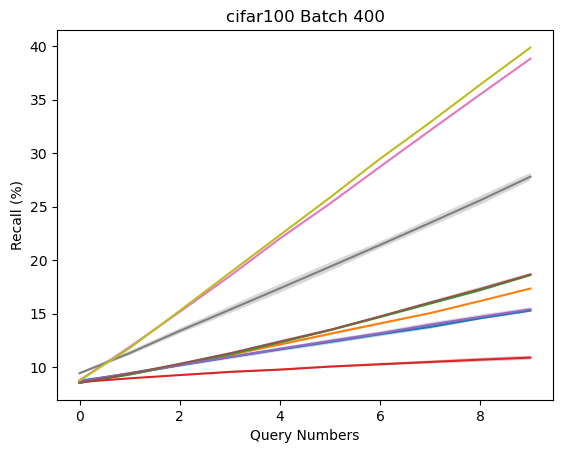

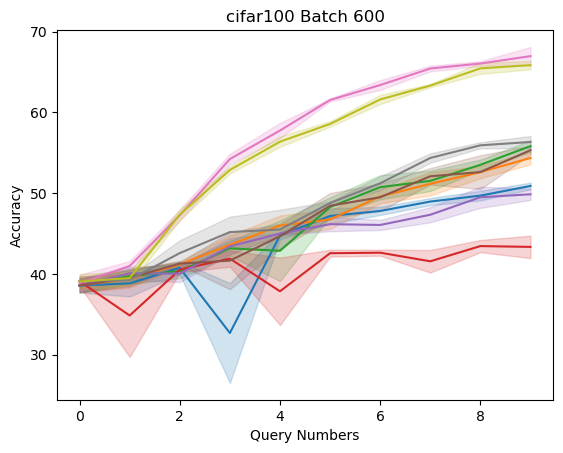

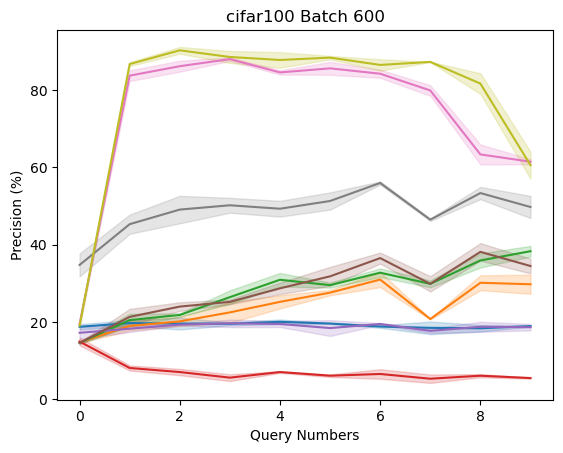

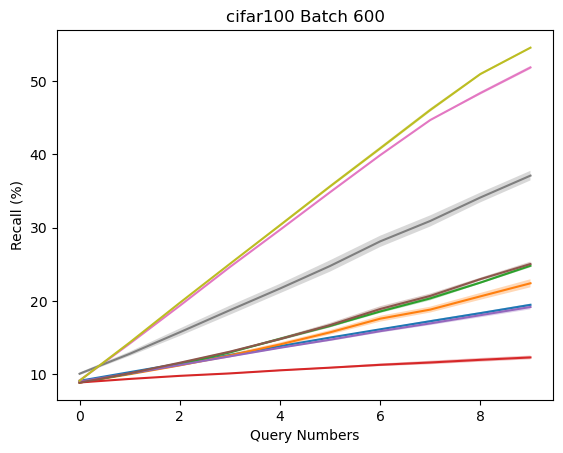

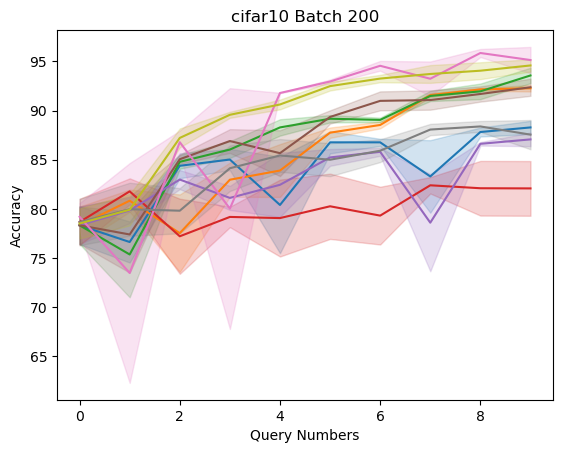

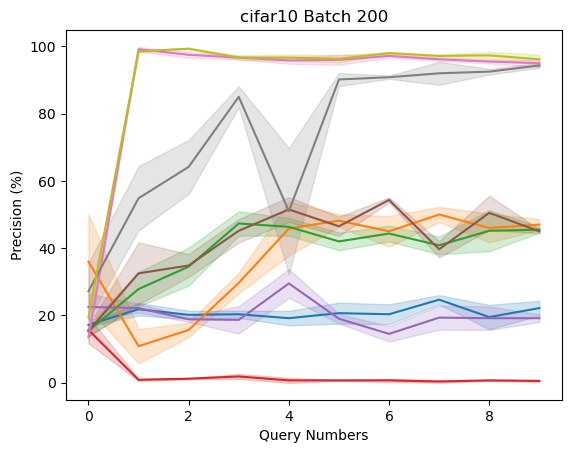

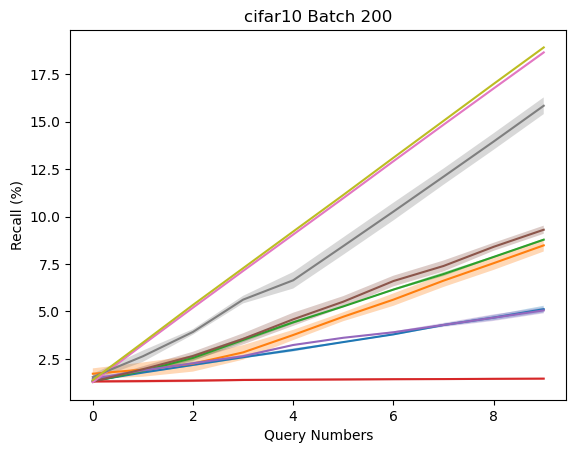

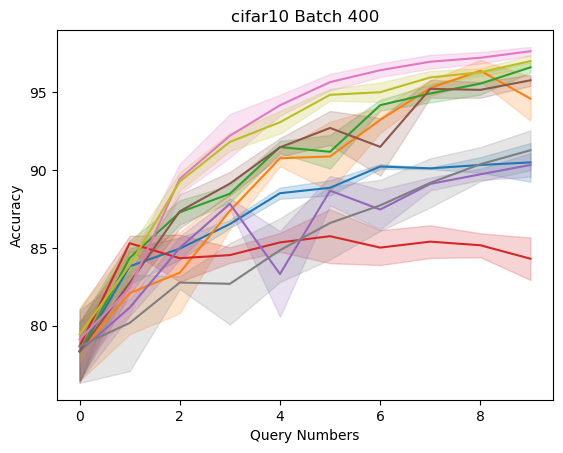

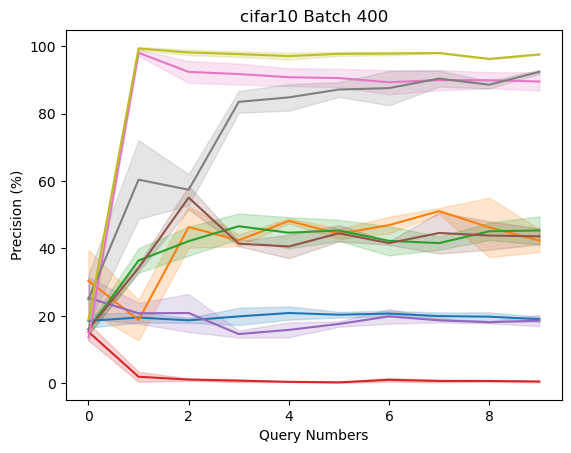

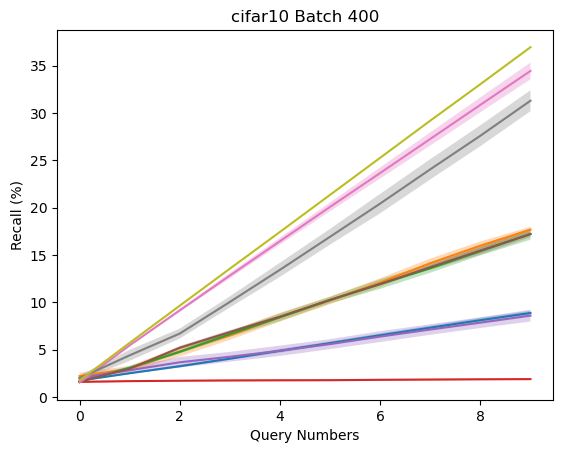

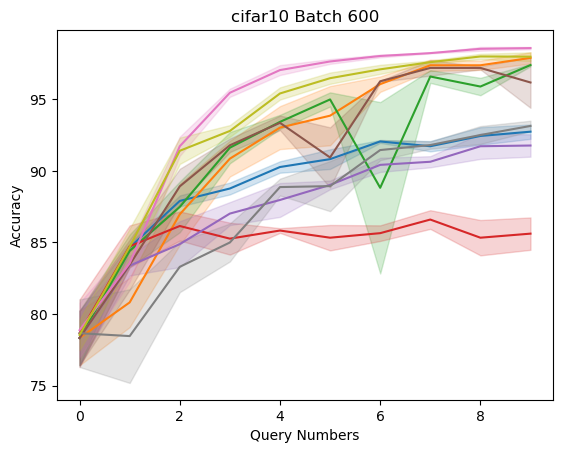

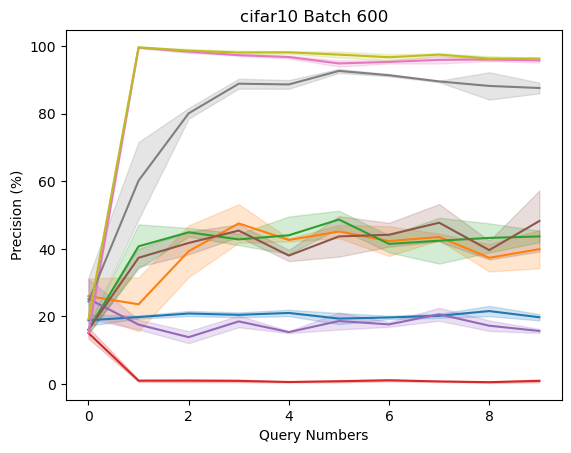

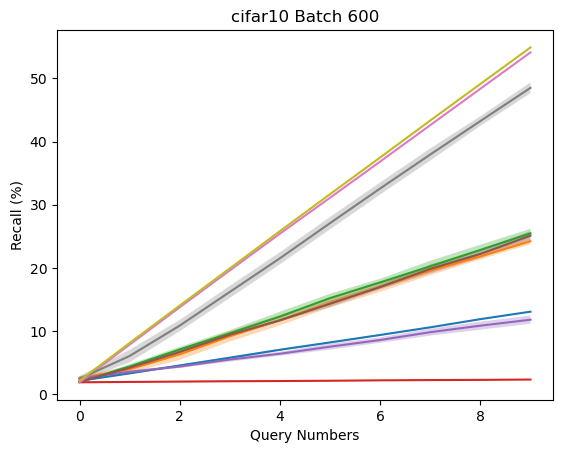

In [80]:
for dataset_name, dataset_info in datasets.items():
    for known_class in dataset_info['known_class']:
        for batch_size in dataset_info['batch']:
            group_name = f"{dataset_name} Known {known_class} Batch {batch_size}"
            pkl_files_dict = load_pkl_files(dataset_name, known_class, batch_size)
            acc_list, precision_list, recall_list = [], [], []
            acc_std_list, precision_std_list, recall_std_list = [], [], []

            for method, files in pkl_files_dict.items():
                acc_vals, precision_vals, recall_vals = [], [], []
                for file in files:
                    with open(file, 'rb') as f:
                        data = pickle.load(f)
                        acc_vals.append([data['Acc'][i] for i in data['Acc']])
                        precision_vals.append([data['Precision'][i] for i in data['Precision']])
                        recall_vals.append([data['Recall'][i] for i in data['Recall']])

                if acc_vals:
                    num_seeds = len(files)
                    acc_avg = np.mean(acc_vals, axis=0).tolist()
                    precision_avg = np.mean(precision_vals, axis=0).tolist()
                    recall_avg = np.mean(recall_vals, axis=0).tolist()

                    acc_std = np.std(acc_vals, axis=0).tolist()
                    precision_std = np.std(precision_vals, axis=0).tolist()
                    recall_std = np.std(recall_vals, axis=0).tolist()

                    acc_list.append(acc_avg)
                    precision_list.append(precision_avg)
                    recall_list.append(recall_avg)

                    acc_std_list.append(acc_std)
                    precision_std_list.append(precision_std)
                    recall_std_list.append(recall_std)

            plot_graphs(group_name, acc_list, precision_list, recall_list, acc_std_list, precision_std_list,
                        recall_std_list, batch_size)